In [42]:
# Import Dependencies
import requests as req
import json
from citipy import citipy
from random import uniform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# API config info
api_key = "84fe59f3ffa1bf7920c39149bf3dde70"
url = "http://api.openweathermap.org/data/2.5/weather?"

In [29]:
## Generate random lng/lat to put into citipy (citipy take in 2 coordinates (lng, lat))

# Functions for generating random latitude
def rand_lat():
  return uniform(-90, 90)

# Function for generating random longitude
def rand_lng():
  return uniform(-180,180)

In [66]:
# Create df 
weather_data_df = pd.DataFrame(columns=["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Temperature", "Wind Speed"])

# Create initial variables for looping
counter = 0
unique_cities = []

# Initial print statements for output
print("Beginning Data Retrieval")
print("---------------------------")

# While loop to only capture cities without null weather data
while counter < 500:
    city = citipy.nearest_city(rand_lat(), rand_lng())
    query_url =  url + "appid=" + api_key + "&q=" + city.city_name + "," + city.country_code + "&units=imperial"
    weather_response = req.get(query_url)
    weather_json = weather_response.json()

    if weather_json["cod"] == 200:
        # check for duplicates
        if weather_json["name"] not in unique_cities:
            # Append to df
            weather_data_df = weather_data_df.append([{"City": weather_json["name"],
                                                       "Temperature": weather_json["main"]["temp"],
                                                       "Humidity": weather_json["main"]["humidity"],
                                                       "Cloudiness": weather_json["clouds"]["all"],
                                                       "Wind Speed": weather_json["wind"]["speed"],
                                                       "Lat": weather_json["coord"]["lat"],
                                                       "Country": weather_json["sys"]["country"],
                                                       "Lng": weather_json["coord"]["lon"],
                                                       "Date": weather_json["dt"]
                                                      }])
            
            # Add to city-weather data confirmed counter         
            counter += 1
            
            unique_cities.append(weather_json["name"])
        
            # print output statements
            print("Processing Record #" + str(counter) + " | City ID: " + str(weather_json["id"]) + " | City Name: " + city.city_name)
            print(query_url)


Beginning Data Retrieval
---------------------------
Processing Record #1 | City ID: 2075265 | City Name: busselton
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=busselton,au&units=imperial
Processing Record #2 | City ID: 4035715 | City Name: avarua
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=avarua,ck&units=imperial
Processing Record #3 | City ID: 3471451 | City Name: arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=arraial do cabo,br&units=imperial
Processing Record #4 | City ID: 2303611 | City Name: axim
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=axim,gh&units=imperial
Processing Record #5 | City ID: 6690296 | City Name: saint-joseph
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=saint-joseph,re&units=imperial
Processing Record #6 | City ID: 2270385 | City Nam

Processing Record #47 | City ID: 6111862 | City Name: port hardy
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=port hardy,ca&units=imperial
Processing Record #48 | City ID: 3652764 | City Name: puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=puerto ayora,ec&units=imperial
Processing Record #49 | City ID: 1738050 | City Name: miri
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=miri,my&units=imperial
Processing Record #50 | City ID: 2396518 | City Name: port-gentil
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=port-gentil,ga&units=imperial
Processing Record #51 | City ID: 5681948 | City Name: fallon
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=fallon,us&units=imperial
Processing Record #52 | City ID: 1529484 | City Name: hami
http://api.openweathermap.org/data/2.5/weathe

Processing Record #94 | City ID: 1529376 | City Name: korla
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=korla,cn&units=imperial
Processing Record #95 | City ID: 5062458 | City Name: west fargo
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=west fargo,us&units=imperial
Processing Record #96 | City ID: 2070998 | City Name: geraldton
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=geraldton,au&units=imperial
Processing Record #97 | City ID: 3418910 | City Name: upernavik
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=upernavik,gl&units=imperial
Processing Record #98 | City ID: 2122090 | City Name: pevek
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=pevek,ru&units=imperial
Processing Record #99 | City ID: 2017155 | City Name: saskylakh
http://api.openweathermap.org/data/2.5/weather?app

Processing Record #140 | City ID: 5847411 | City Name: kahului
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=kahului,us&units=imperial
Processing Record #141 | City ID: 145531 | City Name: saurimo
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=saurimo,ao&units=imperial
Processing Record #142 | City ID: 2108502 | City Name: honiara
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=honiara,sb&units=imperial
Processing Record #143 | City ID: 2636790 | City Name: stornoway
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=stornoway,gb&units=imperial
Processing Record #144 | City ID: 5160783 | City Name: lima
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=lima,us&units=imperial
Processing Record #145 | City ID: 2411397 | City Name: georgetown
http://api.openweathermap.org/data/2.5/weather?appid

Processing Record #186 | City ID: 415189 | City Name: aden
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=aden,ye&units=imperial
Processing Record #187 | City ID: 3404558 | City Name: cabedelo
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=cabedelo,br&units=imperial
Processing Record #188 | City ID: 6255012 | City Name: flinders
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=flinders,au&units=imperial
Processing Record #189 | City ID: 3573374 | City Name: the valley
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=the valley,ai&units=imperial
Processing Record #190 | City ID: 3355672 | City Name: luderitz
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=luderitz,na&units=imperial
Processing Record #191 | City ID: 1862505 | City Name: hirara
http://api.openweathermap.org/data/2.5/weather?a

Processing Record #232 | City ID: 4059102 | City Name: dothan
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=dothan,us&units=imperial
Processing Record #233 | City ID: 2427637 | City Name: mongo
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=mongo,td&units=imperial
Processing Record #234 | City ID: 217570 | City Name: buta
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=buta,cd&units=imperial
Processing Record #235 | City ID: 2031405 | City Name: erdenet
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=erdenet,mn&units=imperial
Processing Record #236 | City ID: 964420 | City Name: port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=port elizabeth,za&units=imperial
Processing Record #237 | City ID: 2139521 | City Name: noumea
http://api.openweathermap.org/data/2.5/weather?appid=

Processing Record #278 | City ID: 6067472 | City Name: marystown
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=marystown,ca&units=imperial
Processing Record #279 | City ID: 584051 | City Name: svetlogorsk
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=svetlogorsk,ru&units=imperial
Processing Record #280 | City ID: 546105 | City Name: nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=nikolskoye,ru&units=imperial
Processing Record #281 | City ID: 3356832 | City Name: henties bay
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=henties bay,na&units=imperial
Processing Record #282 | City ID: 2449893 | City Name: tessalit
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=tessalit,ml&units=imperial
Processing Record #283 | City ID: 1337619 | City Name: ugoofaaru
http://api.openweatherma

Processing Record #324 | City ID: 625144 | City Name: minsk
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=minsk,by&units=imperial
Processing Record #325 | City ID: 1529195 | City Name: shihezi
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=shihezi,cn&units=imperial
Processing Record #326 | City ID: 359796 | City Name: suez
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=suez,eg&units=imperial
Processing Record #327 | City ID: 6185377 | City Name: yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=yellowknife,ca&units=imperial
Processing Record #328 | City ID: 2236967 | City Name: soyo
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=soyo,ao&units=imperial
Processing Record #329 | City ID: 5955902 | City Name: fort nelson
http://api.openweathermap.org/data/2.5/weather?appid=84fe5

Processing Record #370 | City ID: 1787335 | City Name: jinxiang
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=jinxiang,cn&units=imperial
Processing Record #371 | City ID: 4081914 | City Name: oxford
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=oxford,us&units=imperial
Processing Record #372 | City ID: 2021041 | City Name: kyra
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=kyra,ru&units=imperial
Processing Record #373 | City ID: 2019118 | City Name: nizhniy tsasuchey
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=nizhniy tsasuchey,ru&units=imperial
Processing Record #374 | City ID: 3377301 | City Name: mabaruma
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=mabaruma,gy&units=imperial
Processing Record #375 | City ID: 1489656 | City Name: teya
http://api.openweathermap.org/data/2.5/

Processing Record #416 | City ID: 57289 | City Name: hargeysa
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=hargeysa,so&units=imperial
Processing Record #417 | City ID: 2016216 | City Name: sosnovo-ozerskoye
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=sosnovo-ozerskoye,ru&units=imperial
Processing Record #418 | City ID: 933644 | City Name: ghanzi
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=ghanzi,bw&units=imperial
Processing Record #419 | City ID: 577240 | City Name: bereznik
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=bereznik,ru&units=imperial
Processing Record #420 | City ID: 543018 | City Name: mishkino
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=mishkino,ru&units=imperial
Processing Record #421 | City ID: 3460707 | City Name: itapicuru
http://api.openweathermap.org/d

Processing Record #462 | City ID: 3514843 | City Name: vega de alatorre
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=vega de alatorre,mx&units=imperial
Processing Record #463 | City ID: 3394326 | City Name: muana
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=muana,br&units=imperial
Processing Record #464 | City ID: 3664980 | City Name: boa vista
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=boa vista,br&units=imperial
Processing Record #465 | City ID: 2109701 | City Name: auki
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=auki,sb&units=imperial
Processing Record #466 | City ID: 2027044 | City Name: batagay
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=batagay,ru&units=imperial
Processing Record #467 | City ID: 3395981 | City Name: maceio
http://api.openweathermap.org/data/2.5/we

In [67]:
weather_data_df.count()

City           500
Cloudiness     500
Country        500
Date           500
Humidity       500
Lat            500
Lng            500
Temperature    500
Wind Speed     500
dtype: int64

In [68]:
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temperature,Wind Speed
0,Busselton,0,AU,1519879770,79,-33.64,115.35,77.03,15.46
0,Avarua,40,CK,1519876800,79,-21.21,-159.78,86.00,8.05
0,Arraial do Cabo,92,BR,1519879772,100,-22.97,-42.02,74.33,5.39
0,Axim,32,GH,1519879772,99,4.87,-2.24,81.44,9.08
0,Saint-Joseph,0,RE,1519876800,58,-21.37,55.62,82.40,4.70


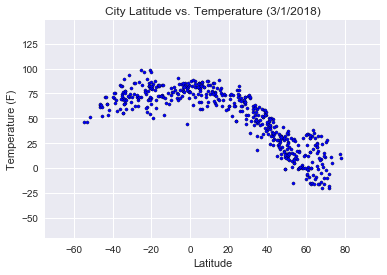

In [69]:
### Create the necessary graphs from the data frame

## Temperature (F) vs. Latitude
plt.title("City Latitude vs. Temperature (3/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.xlim(min(weather_data_df["Lat"])-20, max(weather_data_df["Lat"]) + 20)
plt.ylim(min(weather_data_df["Temperature"])-50, max(weather_data_df["Temperature"]) + 50)


plt.scatter(weather_data_df["Lat"], weather_data_df["Temperature"], s =10, edgecolor = "black", c = "blue")
sns.set()
plt.show()

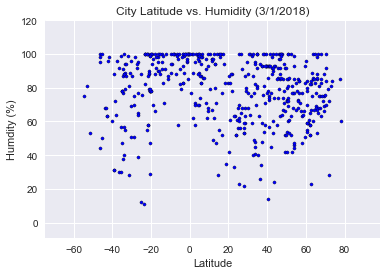

In [70]:
## Humidity (%) vs. Latitude
plt.title("City Latitude vs. Humidity (3/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humdity (%)")

plt.xlim(min(weather_data_df["Lat"])-20, max(weather_data_df["Lat"]) + 20)
plt.ylim(min(weather_data_df["Humidity"])-20, max(weather_data_df["Humidity"]) + 20)


plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"], s =10, edgecolor = "black", c = "blue")
sns.set()
plt.show()

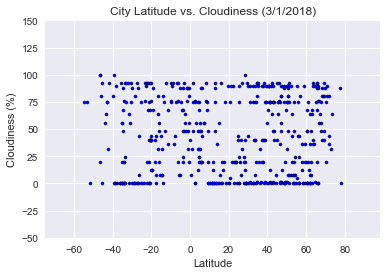

In [71]:
## Cloudiness (%) vs. Latitude
plt.title("City Latitude vs. Cloudiness (3/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.xlim(min(weather_data_df["Lat"])-20, max(weather_data_df["Lat"]) + 20)
plt.ylim(min(weather_data_df["Cloudiness"])-50, max(weather_data_df["Cloudiness"]) + 50)


plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"], s =10, edgecolor = "black", c = "blue")
sns.set()
plt.show()

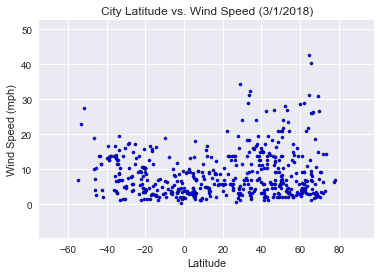

In [72]:
## Wind Speed (mph) vs. Latitude
plt.title("City Latitude vs. Wind Speed (3/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.xlim(min(weather_data_df["Lat"])-20, max(weather_data_df["Lat"]) + 20)
plt.ylim(min(weather_data_df["Wind Speed"])-10, max(weather_data_df["Wind Speed"]) + 10)


plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"], s =10, edgecolor = "black", c = "blue")
sns.set()
plt.show()

In [73]:
# TESTING - not in df series
df = pd.DataFrame({"a": [1,2,3], "b": [4,5,6]})

x = 2
if x not in df["a"]:
    print("not here")
else:
    print("here")
    

here


In [74]:
# Output to csv
weather_data_df.to_csv("weather_data.csv", encoding="utf-8", index=False)